In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Walmart.csv')

In [ ]:
import time
import datetime

In [ ]:
for i in dataset.index:
  element = datetime.datetime.strptime(dataset['Date'][i],"%d-%m-%Y")
  dataset['Date'][i] = datetime.datetime.timestamp(element)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


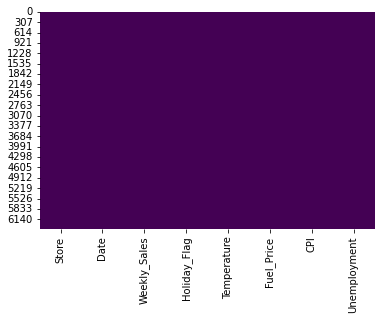

In [ ]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dfh=dataset.Holiday_Flag
dft=dataset.Temperature
dffu=dataset.Fuel_Price
dfcp=dataset.CPI
dfu=dataset.Unemployment
dfs=dataset.Weekly_Sales

In [ ]:
from scipy.stats import pearsonr
pearsonr(dft,dfs)

(-0.06381001317946956, 3.0076476258601934e-07)

In [ ]:
dffu.corr(dft)

0.14498180596996513

In [ ]:
dful=list(dfu)

In [ ]:
q1=dataset.quantile(0.25)
q3=dataset.quantile(0.75)
q2=dataset.quantile(0.50)
iqr=q3-q1
maxq=q3+(1.5*iqr)
minq=q1-(1.5*iqr)

In [ ]:
type(minq.Unemployment)

numpy.float64

In [ ]:
maxq.Unemployment

11.218499999999999

In [ ]:
flagu=0
for i in dful:
  if i >= float(minq.Unemployment) and i<=maxq.Unemployment:
    flagu=flagu+1
print(dataset.Unemployment.count()-flagu)

481


In [ ]:
df1=dataset.copy(deep=True)

In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
df1u=df1.Unemployment

In [ ]:
#df1new=df1.copy()

In [ ]:
type(df1u)

pandas.core.series.Series

In [ ]:
minu=float(minq.Unemployment)
maxu=float(maxq.Unemployment)

In [ ]:
df1new=df1[(df1['Unemployment'] >=minu) & (df1['Unemployment'] <=maxu)]

In [ ]:
df1new.shape

(5954, 8)

In [ ]:
df1.shape

(6435, 8)

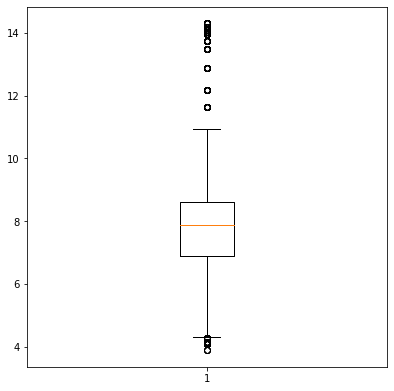

In [ ]:
fig=plt.figure(figsize=(5,5)) 
ax=fig.add_axes([0,0,1,1])
bp=ax.boxplot(dfu)
plt.show()

In [ ]:
results = smf.ols('Weekly_Sales~Store+Holiday_Flag+Temperature+Fuel_Price+CPI+Unemployment ', data=df1new).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sat, 14 May 2022   Prob (F-statistic):          1.04e-176
Time:                        08:16:41   Log-Likelihood:                -86964.
No. Observations:                5954   AIC:                         1.739e+05
Df Residuals:                    5947   BIC:                         1.740e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.763e+06   8.74e+04     20.172   

In [ ]:
results = smf.ols('Weekly_Sales~Holiday_Flag+Temperature+Fuel_Price+CPI+Unemployment ', data=dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Sat, 14 May 2022   Prob (F-statistic):           5.93e-34
Time:                        08:16:41   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.727e+06   7.98e+04     21.646   

In [ ]:
df1new


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1265328000.0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1265932800.0,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1266537600.0,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1267142400.0,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1267747200.0,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,1348790400.0,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,1349395200.0,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,1350000000.0,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,1350604800.0,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df1new = pd.get_dummies(df1new,columns=['Store','Holiday_Flag'])

In [ ]:
df1new.drop(['Date'],axis=1,inplace=True)

In [ ]:
df1new

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Holiday_Flag_0,Holiday_Flag_1
0,1643690.90,42.31,2.572,211.096358,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1641957.44,38.51,2.548,211.242170,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1611968.17,39.93,2.514,211.289143,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1409727.59,46.63,2.561,211.319643,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1554806.68,46.50,2.625,211.350143,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6431,733455.07,64.89,3.985,192.170412,8.667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6432,734464.36,54.47,4.000,192.327265,8.667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6433,718125.53,56.47,3.969,192.330854,8.667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
X11 = pd.DataFrame(df1new.iloc[:, 3:].values)
y0 = df1new.iloc[:, 2:3].values
X12= pd.DataFrame(df1new.iloc[:,0:2].values)
lx=[X11,X12]
X0=pd.concat([X11, X12.reindex(X11.index)], axis=1)

In [ ]:
X0

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,0,1
0,211.096358,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1643690.90,42.31
1,211.242170,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1641957.44,38.51
2,211.289143,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1611968.17,39.93
3,211.319643,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1409727.59,46.63
4,211.350143,8.106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1554806.68,46.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,192.013558,8.684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,713173.95,64.88
5950,192.170412,8.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,733455.07,64.89
5951,192.327265,8.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,734464.36,54.47
5952,192.330854,8.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,718125.53,56.47


In [ ]:
len(X0.columns)

51

#**MULTIPLE LINEAR REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X0, y0, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y1_pred=regressor1.predict(X1_test)

In [ ]:
from sklearn.metrics import r2_score as r2
print(r2(y1_test,y1_pred))

0.6242542762730736


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
mse1=mse(y1_test,y1_pred)
rmse1=sqrt(mse1)

In [ ]:
print('MSE:'+str(mse1)+"\nRMSE:"+str(rmse1))

MSE:0.08169541458375046
RMSE:0.2858240972761927


In [ ]:
r_sq1=regressor1.score(X1_test,y1_test)
r_sq1

0.6242542762730736

In [ ]:
n=5954
p=51

In [ ]:
adjr_sq1 = 1-(1-r_sq1)*(n-1)/(n-p-1)
adjr_sq1

0.6210074053970869

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae1=mae(y1_test,y1_pred)
print(mae1)

0.23735330986330888


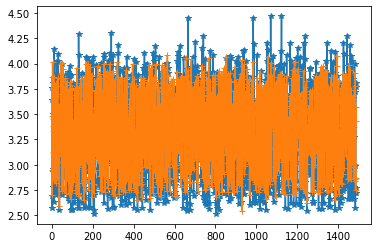

In [ ]:
g=plt.plot(y1_test,marker='*')
h=plt.plot(y1_pred,marker='+')

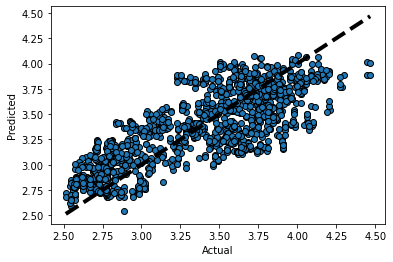

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y1_test, y1_pred, edgecolors=(0, 0, 0))
ax.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
y1_pred

array([[3.87022831],
       [3.48175758],
       [2.70258465],
       ...,
       [2.86949612],
       [3.57009278],
       [3.43354895]])

#**POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg1=PolynomialFeatures(degree=3)
x1_poly=poly_reg1.fit_transform(X0)


In [ ]:
from sklearn.model_selection import train_test_split
X1p_train, X1p_test, y1p_train, y1p_test = train_test_split(x1_poly, y0, test_size = 0.25, random_state = 0)

In [ ]:
lin_reg2=LinearRegression()
lin_reg2.fit(X1p_train,y1p_train)
y1p_pred=lin_reg2.predict(X1p_test)

In [ ]:
r_sq2=lin_reg2.score(X1p_test,y1p_test)
r_sq2

0.747989234172149

In [ ]:
adjr_sq2 = 1-(1-r_sq2)*(n-1)/(n-p-1)
adjr_sq2

0.7458115742166729

In [ ]:
mse2=mse(y1p_test,y1p_pred)
rmse2=sqrt(mse2)

In [ ]:
print('MSE:'+str(mse2)+"\nRMSE:"+str(rmse2))

MSE:0.05479270339969907
RMSE:0.23407841292972548


In [ ]:
mae2=mae(y1p_test,y1p_pred)
print(mae2)

0.18503871934518085


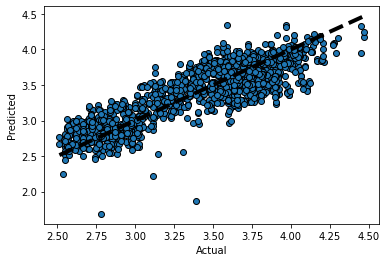

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y1p_test, y1p_pred, edgecolors=(0, 0, 0))
ax.plot([y1p_test.min(), y1p_test.max()], [y1p_test.min(), y1p_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

#**RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1)
rr.fit(X1_train, y1_train)

Ridge(alpha=1)

In [ ]:
y3_pred=rr.predict(X1_test)

In [ ]:
r_sq3=rr.score(X1_test,y1_test)
r_sq3

0.49753814568319277

In [ ]:
adjr_sq3 = 1-(1-r_sq3)*(n-1)/(n-p-1)
adjr_sq3

0.4931963031602926

In [ ]:
mse3=mse(y1_test,y3_pred)
rmse3=sqrt(mse3)

In [ ]:
print('MSE:'+str(mse3)+"\nRMSE:"+str(rmse3))

MSE:0.109246298517462
RMSE:0.3305242782572288


In [ ]:
mae3=mae(y1_test,y3_pred)
print(mae3)

0.275672402328701


#**LASSO REGRESSION**

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.000000000008)
clf.fit(X1_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+02, tolerance: 9.215e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=8e-12)

In [ ]:
y4_pred=clf.predict(X1_test)

In [ ]:
r_sq4=clf.score(X1_test,y1_test)
r_sq4

0.6241393197623548

In [ ]:
adjr_sq4 = 1-(1-r_sq4)*(n-1)/(n-p-1)
adjr_sq4

0.6208914555312264

In [ ]:
mse4=mse(y1_test,y4_pred)
rmse4=sqrt(mse4)

In [ ]:
print('MSE:'+str(mse4)+"\nRMSE:"+str(rmse4))

MSE:0.0817204086667413
RMSE:0.28586781677331446


In [ ]:
mae4=mae(y1_test,y4_pred)
print(mae4)

0.23747472655522


In [ ]:
from tabulate import tabulate
tdata=[
       ['Multiple Linear Regresssion','R Square',r_sq1],
       ['','Adjusted R Square',adjr_sq1],
       ['','Mean Squared Error',mse1],
       ['','Root Mean Squared Error',rmse1],
       ['','Mean Absolute Error',mae1],[],

       ['Polynomial Regresssion','R Square',r_sq2],
       ['','Adjusted R Square',adjr_sq2],
       ['','Mean Squared Error',mse2],
       ['','Root Mean Squared Error',rmse2],
       ['','Mean Absolute Error',mae2],[],

       ['Ridge Regresssion','R Square',r_sq3],
       ['','Adjusted R Square',adjr_sq3],
       ['','Mean Squared Error',mse3],
       ['','Root Mean Squared Error',rmse3],
       ['','Mean Absolute Error',mae3],[],

       ['Lasso Regresssion','R Square',r_sq4],
       ['','Adjusted R Square',adjr_sq4],
       ['','Mean Squared Error',mse4],
       ['','Root Mean Squared Error',rmse4],
       ['','Mean Absolute Error',mae4]
]
head=['Model','Evaluation Metric','Value']
print(tabulate(tdata,headers=head,tablefmt="grid"))

+-----------------------------+-------------------------+-----------+
| Model                       | Evaluation Metric       |     Value |
+=============================+=========================+===========+
| Multiple Linear Regresssion | R Square                | 0.624254  |
+-----------------------------+-------------------------+-----------+
|                             | Adjusted R Square       | 0.621007  |
+-----------------------------+-------------------------+-----------+
|                             | Mean Squared Error      | 0.0816954 |
+-----------------------------+-------------------------+-----------+
|                             | Root Mean Squared Error | 0.285824  |
+-----------------------------+-------------------------+-----------+
|                             | Mean Absolute Error     | 0.237353  |
+-----------------------------+-------------------------+-----------+
|                             |                         |           |
+-------------------